<a href="https://colab.research.google.com/github/Devodry/Devodry/blob/main/AAL_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AAL Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sales = pd.read_csv('/content/AAL Sales Analysis.csv')
df_sales.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-20,Morning,WA,Kids,8,20000
1,1-Oct-20,Morning,WA,Men,8,20000
2,1-Oct-20,Morning,WA,Women,4,10000
3,1-Oct-20,Morning,WA,Seniors,15,37500
4,1-Oct-20,Afternoon,WA,Kids,3,7500


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [4]:
df_sales['State'].unique().sum()

' WA NT SA VIC QLD NSW TAS'

In [5]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


<ipython-input-5-eb2d2f4e15fb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sales['Date'] = pd.to_datetime(df_sales['Date'])


It appeared that Sales and Unit were the same.  It turns out that Sales = 2500 * Unit.  We can use Sales only in this case.

In [6]:
sale_unit = df_sales['Sales']/df_sales['Unit']
sale_unit.unique()

array([2500.])

In [7]:
df_sales.shape

(7560, 6)

In [8]:
df_sales.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


There are no null values.

In [9]:
df_sales.isnull().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [10]:
from datetime import datetime
df_sales['day_of_week'] = df_sales['Date'].dt.dayofweek
df_sales.head()

,Date,Time,State,Group,Unit,Sales,day_of_week
0,2020-10-01,Morning,WA,Kids,8,20000,3
1,2020-10-01,Morning,WA,Men,8,20000,3
2,2020-10-01,Morning,WA,Women,4,10000,3
3,2020-10-01,Morning,WA,Seniors,15,37500,3
4,2020-10-01,Afternoon,WA,Kids,3,7500,3


In [11]:
df_sales['Time'] = df_sales['Time'].astype(str)
df_sales['Time'] = df_sales['Time'].str.strip()
time_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3}
df_sales['Time'] = df_sales['Time'].map(time_mapping)
df_sales.head()

,Date,Time,State,Group,Unit,Sales,day_of_week
0,2020-10-01,1,WA,Kids,8,20000,3
1,2020-10-01,1,WA,Men,8,20000,3
2,2020-10-01,1,WA,Women,4,10000,3
3,2020-10-01,1,WA,Seniors,15,37500,3
4,2020-10-01,2,WA,Kids,3,7500,3


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_sales['state_encoded'] = label_encoder.fit_transform(df_sales['State'])
df_sales['group_encoded'] = label_encoder.fit_transform(df_sales['Group'])
df_sales.head()

,Date,Time,State,Group,Unit,Sales,day_of_week,state_encoded,group_encoded
0,2020-10-01,1,WA,Kids,8,20000,3,6,0
1,2020-10-01,1,WA,Men,8,20000,3,6,1
2,2020-10-01,1,WA,Women,4,10000,3,6,3
3,2020-10-01,1,WA,Seniors,15,37500,3,6,2
4,2020-10-01,2,WA,Kids,3,7500,3,6,0


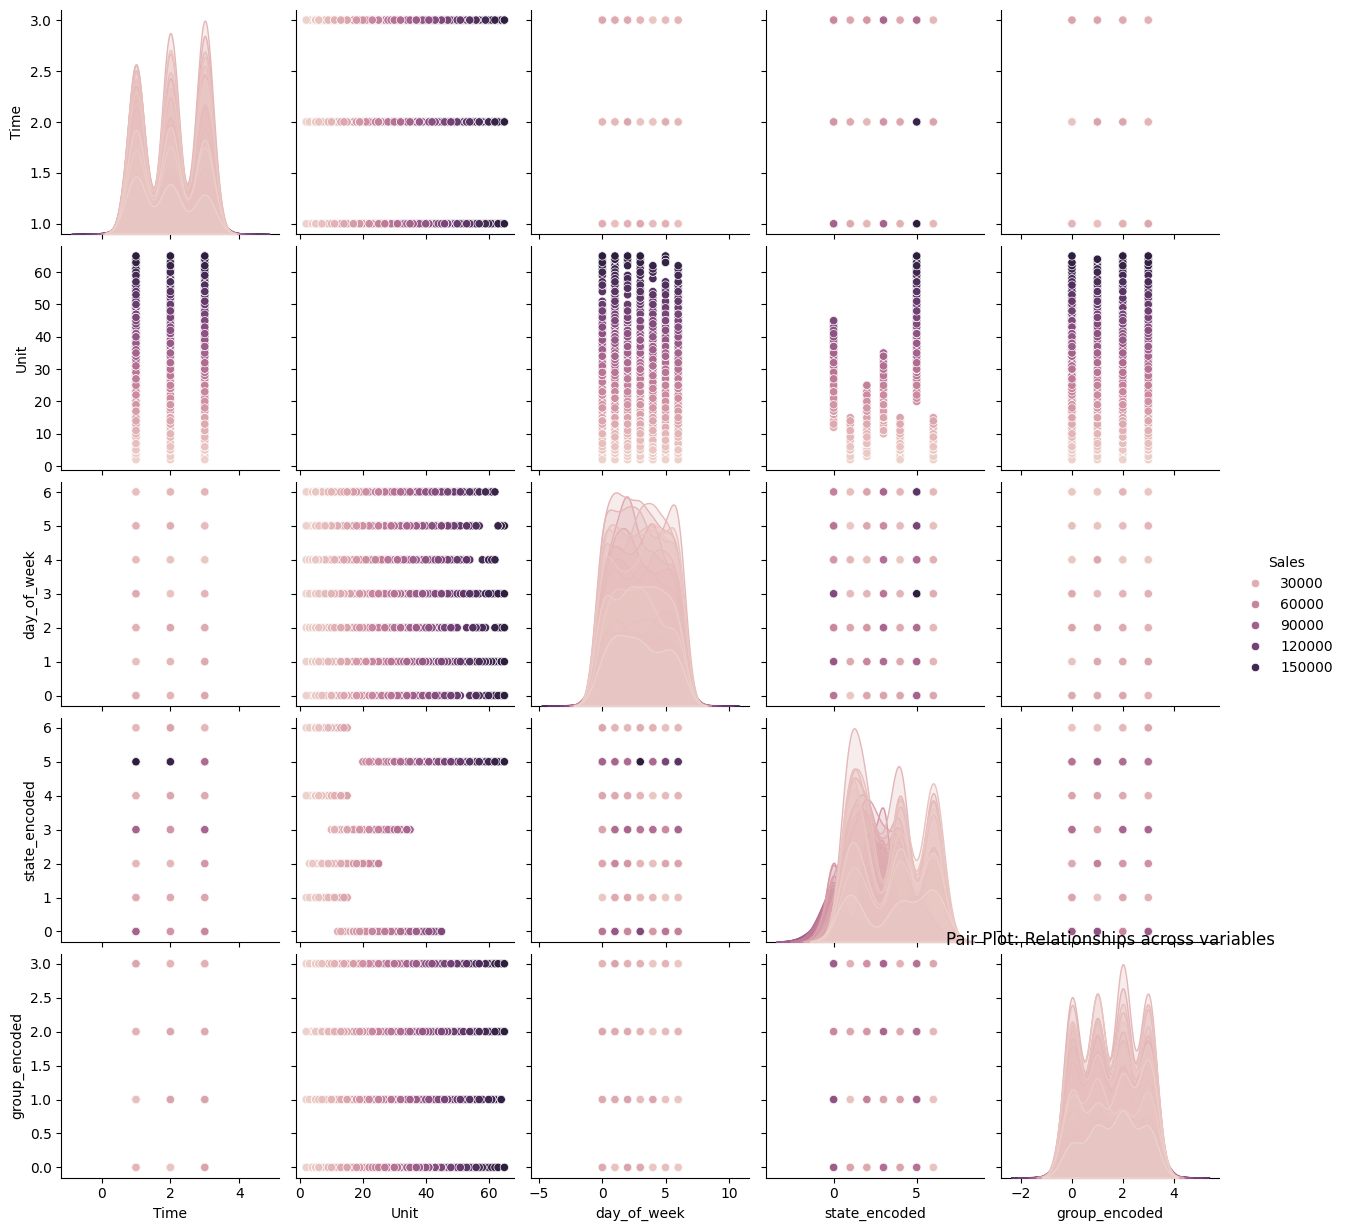

In [13]:
sns.pairplot(df_sales, hue='Sales')
plt.title('Pair Plot: Relationships across variables')
plt.show()

In [14]:
df_sales.head()

,Date,Time,State,Group,Unit,Sales,day_of_week,state_encoded,group_encoded
0,2020-10-01,1,WA,Kids,8,20000,3,6,0
1,2020-10-01,1,WA,Men,8,20000,3,6,1
2,2020-10-01,1,WA,Women,4,10000,3,6,3
3,2020-10-01,1,WA,Seniors,15,37500,3,6,2
4,2020-10-01,2,WA,Kids,3,7500,3,6,0


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_sales[['Sales', 'Unit']] = scaler.fit_transform(df_sales[['Sales', 'Unit']])
df_sales.head()

,Date,Time,State,Group,Unit,Sales,day_of_week,state_encoded,group_encoded
0,2020-10-01,1,WA,Kids,0.095238,0.095238,3,6,0
1,2020-10-01,1,WA,Men,0.095238,0.095238,3,6,1
2,2020-10-01,1,WA,Women,0.031746,0.031746,3,6,3
3,2020-10-01,1,WA,Seniors,0.206349,0.206349,3,6,2
4,2020-10-01,2,WA,Kids,0.015873,0.015873,3,6,0


In [17]:
Q1 = df_sales['Sales'].quantile(0.25)
Q3 = df_sales['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_sales[(df_sales['Sales'] < lower_bound) | (df_sales['Sales'] > upper_bound)]
print("Outliers using IQR method:")
print(outliers)

Outliers using IQR method:
           Date  Time State     Group      Unit     Sales  day_of_week  \
5082 2020-12-01     2   VIC     Women  0.968254  0.968254            1   
5083 2020-12-01     2   VIC   Seniors  0.952381  0.952381            1   
5161 2020-12-02     1   VIC       Men  0.857143  0.857143            2   
5162 2020-12-02     1   VIC     Women  0.904762  0.904762            2   
5169 2020-12-02     3   VIC       Men  0.984127  0.984127            2   
...         ...   ...   ...       ...       ...       ...          ...   
7432 2020-12-29     2   VIC      Kids  1.000000  1.000000            1   
7433 2020-12-29     2   VIC       Men  0.825397  0.825397            1   
7437 2020-12-29     3   VIC       Men  0.825397  0.825397            1   
7515 2020-12-30     1   VIC   Seniors  1.000000  1.000000            2   
7519 2020-12-30     2   VIC   Seniors  0.952381  0.952381            2   

      state_encoded  group_encoded  
5082              5              3  
5083      

In [18]:
grouped_df = df_sales.groupby('group_encoded').agg({
    'Sales': 'sum',  # Sum for Value1
}).reset_index()

print(grouped_df)

   group_encoded       Sales
0              0  480.142857
1              1  484.444444
2              2  473.571429
3              3  482.492063


In [19]:
grouped_df = df_sales.groupby('group_encoded').agg({
    'Sales': 'mean',  # Sum for Value1
}).reset_index()

print(grouped_df)

   group_encoded     Sales
0              0  0.254044
1              1  0.256320
2              2  0.250567
3              3  0.255287


In [20]:
df_sales = pd.read_csv('/content/AAL Sales Analysis.csv')
df_sales['Group'] = df_sales['Group'].str.strip()

df_Kids = df_sales[df_sales['Group'] == 'Kids']
df_Seniors = df_sales[df_sales['Group'] == 'Seniors']
df_Men = df_sales[df_sales['Group'] == 'Men']
df_Women = df_sales[df_sales['Group'] == 'Women']

print("\nKids DataFrame:")
print(df_Kids)

print("\nSeniors DataFrame:")
print(df_Seniors)

print("\nMen DataFrame:")
print(df_Men)

print("\nWomen DataFrame:")
print(df_Women)


Kids DataFrame:
           Date        Time State Group  Unit  Sales
0      1-Oct-20     Morning    WA  Kids     8  20000
4      1-Oct-20   Afternoon    WA  Kids     3   7500
8      1-Oct-20     Evening    WA  Kids    15  37500
12     1-Oct-20     Morning    NT  Kids    13  32500
16     1-Oct-20   Afternoon    NT  Kids    13  32500
...         ...         ...   ...   ...   ...    ...
7540  30-Dec-20   Afternoon   NSW  Kids    35  87500
7544  30-Dec-20     Evening   NSW  Kids    37  92500
7548  30-Dec-20     Morning   TAS  Kids    10  25000
7552  30-Dec-20   Afternoon   TAS  Kids     6  15000
7556  30-Dec-20     Evening   TAS  Kids    15  37500

[1890 rows x 6 columns]

Seniors DataFrame:
           Date        Time State    Group  Unit  Sales
3      1-Oct-20     Morning    WA  Seniors    15  37500
7      1-Oct-20   Afternoon    WA  Seniors    11  27500
11     1-Oct-20     Evening    WA  Seniors    10  25000
15     1-Oct-20     Morning    NT  Seniors    10  25000
19     1-Oct-20   Afte

In [21]:
df_sales.groupby('State')['Sales'].sum().sort_values(ascending=False)

,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


**Sales by State**

<Axes: xlabel='State', ylabel='Sales'>

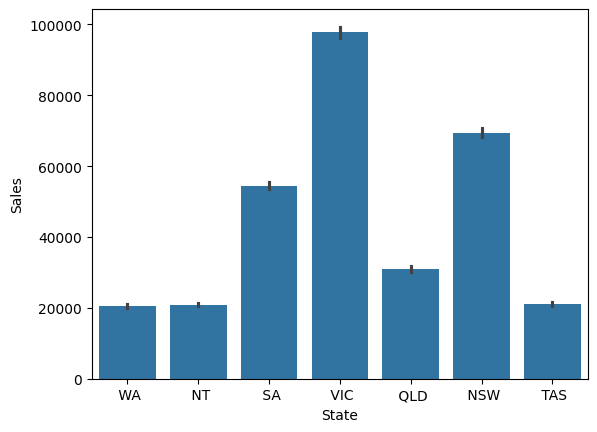

In [22]:
sns.barplot(x='State',y='Sales',data=df_sales)

In [27]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Extract day, week, month, and quarter
df_sales['day'] = df_sales['Date'].dt.day
df_sales['week'] = df_sales['Date'].dt.isocalendar().week
df_sales['month'] = df_sales['Date'].dt.month
df_sales['quarter'] = df_sales['Date'].dt.quarter
df_sales.head()

<ipython-input-27-320cbf507272>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sales['Date'] = pd.to_datetime(df_sales['Date'])


,Date,Time,State,Group,Unit,Sales,day,week,month,quarter
0,2020-10-01,Morning,WA,Kids,8,20000,1,40,10,4
1,2020-10-01,Morning,WA,Men,8,20000,1,40,10,4
2,2020-10-01,Morning,WA,Women,4,10000,1,40,10,4
3,2020-10-01,Morning,WA,Seniors,15,37500,1,40,10,4
4,2020-10-01,Afternoon,WA,Kids,3,7500,1,40,10,4


<Axes: xlabel='day', ylabel='Sales'>

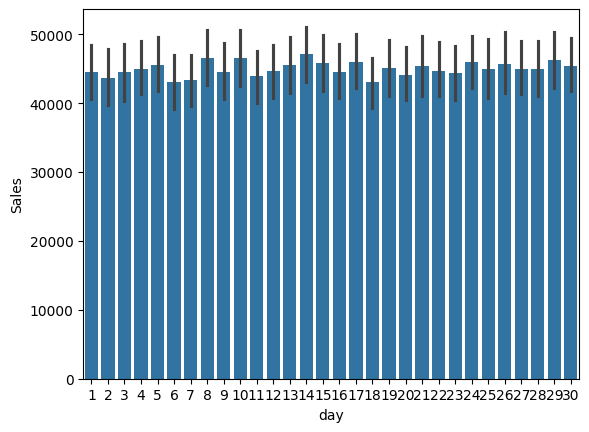

In [28]:
sns.barplot(x='day',y='Sales',data=df_sales)

<Axes: xlabel='week', ylabel='Sales'>

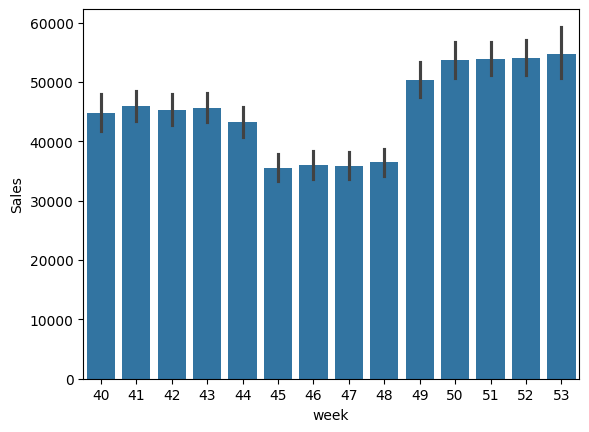

In [29]:
sns.barplot(x='week',y='Sales',data=df_sales)

<Axes: xlabel='month', ylabel='Sales'>

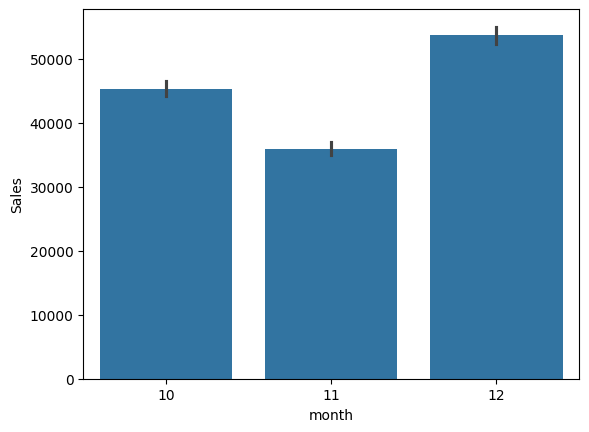

In [30]:
sns.barplot(x='month',y='Sales',data=df_sales)

<Axes: xlabel='quarter', ylabel='Sales'>

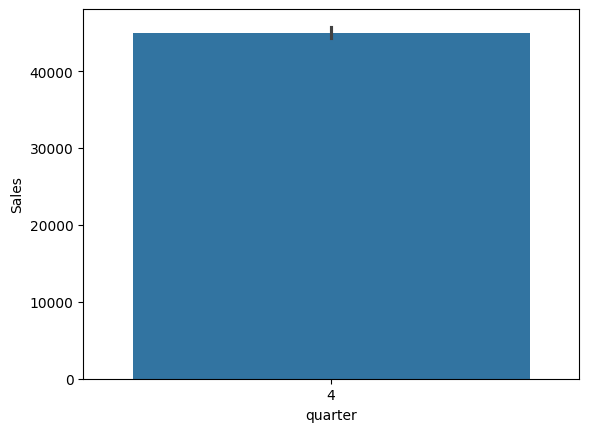

In [31]:
sns.barplot(x='quarter',y='Sales',data=df_sales)

<Axes: xlabel='Time', ylabel='Sales'>

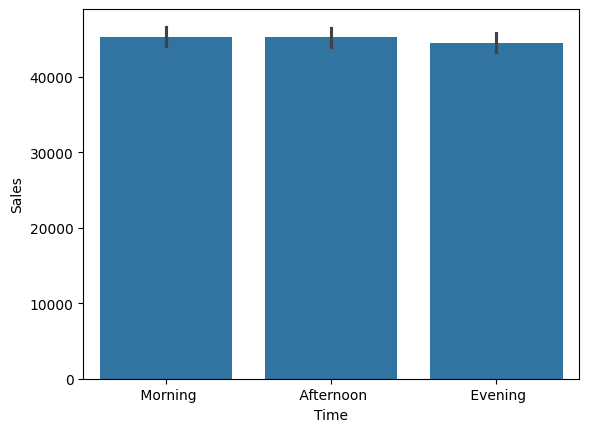

In [32]:
sns.barplot(x='Time',y='Sales',data=df_sales)